<a href="https://colab.research.google.com/github/panktishah62/Explainable-Artificial-Intelligence-XAI-/blob/master/XAI%20-%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Explainability: Exploratory Analysis and Visualization (Part 5)




As all of us know data visualization has been a major tool for learning meaningful information from data. A few such techniques can help to find the important characteristics and relevant manifestations of data. This can point us to what is potentially influential for the decision- making capacity of a model, which could be easily understood by humans.

Hence we have created a small module which covers examples of :

.

(1) Permutation Importance

Reference:

https://www.kaggle.com/dansbecker/permutation-importance
https://eli5.readthedocs.io/en/latest/
https://github.com/cog-data/ML_Interpretability_tutorial/blob/master/Machine_Learning_Interpretability_tutorial.ipynb

(2) Partial Dependence Plots (PDP)

References:
https://www.kaggle.com/dansbecker/partial-plots
https://github.com/cog-data/ML_Interpretability_tutorial/blob/master/Machine_Learning_Interpretability_tutorial.ipynb

(3) Individual Conditional Expectation (ICE)

Reference:
https://github.com/cog-data/ML_Interpretability_tutorial/blob/master/Machine_Learning_Interpretability_tutorial.ipynb

(4) Global Surrogate

https://www.mikulskibartosz.name/using-a-surrogate-model-to-interpret-a-machine-learning-model/
https://medium.com/@santiagof/model-interpretability-making-your-model-confesses-surrogate-models-3dbf72bee8e
https://www.analyticsvidhya.com/blog/2019/08/decoding-black-box-step-by-step-guide-interpretable-machine-learning-models-python/

(5) Local Surrogate - LIME

5.1 LIME in Text

5.2 LIME in Computer Vision

References:
https://github.com/cog-data/ML_Interpretability_tutorial/blob/master/Machine_Learning_Interpretability_tutorial.ipynb


(6) SHAP

6.1 Shapley Values

References: https://www.kaggle.com/dansbecker/shap-values

6.2 Summary Plots – Aggregating SHAP values
https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values






We have used some libraries to make our work easier.

**matplotlib** : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

**Numpy**: NumPy provides a high-performance multidimensional array object, and tools for working with these arrays.

**Pandas**: Pandas help us to organize data and manipulate the data by putting it in a tabular form.

**Scikit Learn (sklearn)**: Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

**Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



# Permutation Importance

In a given model, What features have the biggest impact on predictions? How to know the importance of a feature in model? This concept is called feature importance.

One of the approach to measure feature importance is Permutation Importance. It is fast to calculate and widly used.Permutation importance is calculated after a model has been fitted.In this approach we will shuffle the data in a single feature leaving all other features and target as it is and then calculate the accuray of that model.This accuray will be less, since the resulting data no longer corresponds to anything observed in the real world. But if the feature has much importance, then the impact of that feature will occur on accuray and it will decrease drastically.By performing this shuffle to every feature individually we can calculate the importance of each feature in the model.

Following steps are included in this approach:

1)Train the original dataset.

2)Shuffle the values of a single column and make predictions from this new dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.

3)Repeat step 2 for each column in original dataset and calculate importance of each column.

Here I have taken an example of HR_comma.csv dataset. In this datset, the data of employees who left or did not left the company based on different features such as satisfaction_level, promotion_last_5year,etc is given.

Here we will use ELI5 python library to show importance of weights and predict outcome of perticular row depending on features importance.ELI5 is a Python library which allows to visualize and debug various Machine Learning models using unified API.It has built-in support for several ML frameworks and provides a way to explain white-box models (Linear Regression , Decision Trees ) & black-box models (Keras , XGBoost , LightGBM) . It works for both Regression & Classification models.

First import the dataset and make a dataframe of the features and then fit the model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/prachipatel01/Data_files.git
!ls Data_files
df=pd.read_csv(r"Data_files/HR_comma_sep.csv")

new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

df_dummies=pd.get_dummies(new_df.salary,prefix="salary")
new_df2=pd.concat([new_df,df_dummies],axis='columns')

new_df2=new_df2.drop('salary',axis='columns')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(new_df2, df.left, test_size=0.33)

reg=LogisticRegression()
reg.fit(X_train,y_train)

reg.predict(X_test)

print("score = ",reg.score(X_test,y_test))

feature_names = [i for i in new_df2.columns]


fatal: destination path 'Data_files' already exists and is not an empty directory.
headbrain.csv  HR_comma_sep.csv  titanic.csv
score =  0.7739393939393939


To calculate importance of features we have to import ELI5 python library.ELI5 is allows to visualize and debug various Machine Learning models using unified API. It has built-in PermutationImportance library which is used to calculate importance of features.

In [ ]:
pip install eli5

Eli5 provides a way to compute feature importances for any black-box or white-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance”

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = feature_names)

Weight,Feature
0.0602 ± 0.0044,satisfaction_level
0.0012 ± 0.0012,promotion_last_5years
-0.0017 ± 0.0015,salary_high
-0.0038 ± 0.0024,salary_low
-0.0040 ± 0.0030,average_montly_hours
-0.0043 ± 0.0016,salary_medium


In [ ]:
eli5.show_weights(reg, feature_names = feature_names)

Weight?,Feature
+0.751,salary_low
+0.247,salary_medium
+0.003,average_montly_hours
-0.037,<BIAS>
-1.015,salary_high
-1.088,promotion_last_5years
-3.758,satisfaction_level


As the result shown above, the features from top to bottom shows decresing order of feature importance."BIAS" here as the expected average score output by the model, based on the distribution of the training set.

In [ ]:
eli5.show_prediction(reg, X_test.iloc[1], feature_names=feature_names, show_feature_values=True)

show_prediction function predicts the outcome from the most important features of the model shown by show_weights function.

# Partial Dependence Plots (PDP)

Partial dependence plots show how a feature affects predictions.They show how the predictions partially depend on values of the input variables of interest. Partial dependence plots can be interpreted similarly to the coefficients in linear regression or logistic regression models, also partial dependence plots on models can capture more complex patterns than these models.

For example, a PD plot can show whether the probability of high house price increases linearly with area of house. It can show whether less number of rooms in the house will decrease the probability of having high house price. PD can also show the type of relationship, such as a step function, curvilinear, linear and so on.

Partial dependence plots are calculated after a model has been fit.To see how partial plots separate out the effect of each feature, we start by considering a single row of data.We will use the fitted model to predict our outcome. But we repeatedly alter the value for one variable to make a series of predictions. we repeat this experiment with multiple rows from the original dataset, and we plot the average predicted outcome on the vertical axis.


Here i have taken an example of titanic dataset.First import he data from the csv file and preprocess the data to feed into the model

In [ ]:
!git clone https://github.com/prachipatel01/Data_files.git
!ls Data_files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the data from titanic.csv file
df=pd.read_csv("Data_files/titanic.csv")

#preprocessing the data
input_df=df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
output=df.Survived
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
input_df['sex_n']=le_sex.fit_transform(input_df['Sex'])
inputs=input_df.drop('Sex',axis='columns')
import math
age_median=math.floor(inputs.Age.median())
inputs.Age=inputs.Age.fillna(age_median)
feature_names=[i for i in inputs.columns]
print(inputs)

#spliting data into test and train datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(inputs,output,test_size=0.2)

#fit the model using train dataset
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

print("score = ",(model.score(X_test,y_test)))

fatal: destination path 'Data_files' already exists and is not an empty directory.
headbrain.csv  HR_comma_sep.csv  titanic.csv
     Pclass   Age     Fare  sex_n
0         3  22.0   7.2500      1
1         1  38.0  71.2833      0
2         3  26.0   7.9250      0
3         1  35.0  53.1000      0
4         3  35.0   8.0500      1
..      ...   ...      ...    ...
886       2  27.0  13.0000      1
887       1  19.0  30.0000      0
888       3  28.0  23.4500      0
889       1  26.0  30.0000      1
890       3  32.0   7.7500      1

[891 rows x 4 columns]
score =  0.7262569832402235


Install pdpbox to draw partial dependence plot

In [ ]:
pip install pdpbox

     |████████████████████████████████| 57.7MB 76kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=6a501acf43d64cd41e9dbc65e5b7007a3e8cb9f0e6e1a3240111684f764f83ce
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


Draw the pdp plot taking age as feature(you can also take any other feature for pdp plot)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


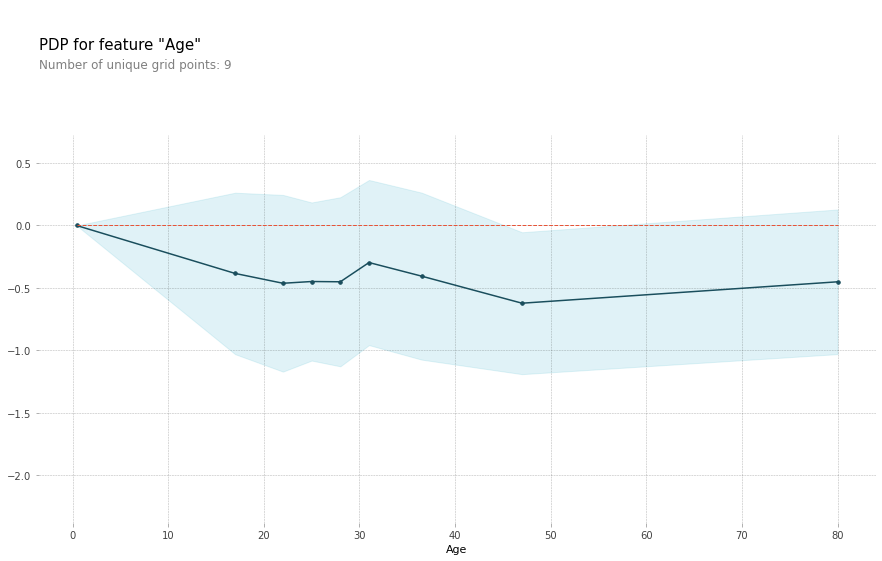

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_train, model_features=feature_names, feature='Age')

# plot it
pdp.pdp_plot(pdp_goals, 'Age')
plt.show()

From the pdp plot shown above, we can see that the chances of survival decreases with the increase in age.

# Individual Conditional Expectation (ICE)

Individual Conditional Expectation (ICE) plots allow us to visualize how changes for a given feature impact the predictions for a set of observations.

Let's use pycebox to create an ICE plot to view how changes in the forty yards dash impact our prediction in our training data.

# Global Surrogate Method
The first model agnostic method we will discuss here is the global surrogate method. A global surrogate model is an interpretable model that is trained to approximate the predictions of a black-box model.

We can draw conclusions about the black-box model by interpreting the surrogate model. So, we are basically solving machine learning interpretability by using more machine learning!

1. We get predictions from the black-box model
2. Next, we select an interpretable model (Linear, decision tree, etc.)
3. We train an interpretable model on the original dataset and use black box predictions as the target
4. Measure the performance of the surrogate model
5. Finally, we interpret the surrogate model to understand how the black-box model is making its decisions



# LIME (Local Interpretable Model agnostic Explanations)
The global surrogate method is good for looking at an interpretable model that can explain predictions for a black-box approach. However, this will not work well if we want to understand how a single prediction was made for a given observation.

This is where we use the LIME technique which stands for local interpretable model agnostic explanations.Let us understand how LIME works using an example.


1. Select your instance of interest for which you want to have an explanation of its black box prediction
2. Perturb your dataset and get the black box predictions for these new fake data points
3. Weight the new samples according to their proximity to the instance of interest
4. Train a weighted, interpretable model on the dataset with the variations
5. Explain the prediction by interpreting the local model
 


We will understand global and lime surrogate using the big mart sales problem. The problem statement includes predicting sales for different items being sold at different outlets.

# Importing the Required Libraries

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

# Reading Data

In [ ]:

!git clone https://github.com/panktishah62/Data_files.git
!ls Data_files
df=pd.read_csv(r"Data-files/data_p.csv")


fatal: destination path 'Data_files' already exists and is not an empty directory.
data_p.csv


# Missing Value Treatment

In [ ]:
# imputing missing values in Item_Weight by median and Outlet_Size with mode
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Feature Engineering

In [ ]:
# creating a broad category of type of Items
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda df: df[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

df['Item_Type_Combined'].value_counts()

# operating years of the store
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

# modifying categories of Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Data Preprocessing

In [ ]:
# label encoding the ordinal variables
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
  df[i] = le.fit_transform(df[i])

# one hot encoding the remaining categorical variables 
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

# Train-Test Split

In [ ]:
# dropping the ID variables and variables that have been used to extract new variables
df.drop(['Item_Type','Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'],axis=1,inplace=True)

# separating the dependent and independent variables
X = df.drop('Item_Outlet_Sales',1)
y = df['Item_Outlet_Sales']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Training a Decision Tree Model

In [ ]:
dt = DecisionTreeRegressor(max_depth = 5, random_state=10)

# fitting the decision tree model on the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

# Use the Graphviz library to visualize the decision tree

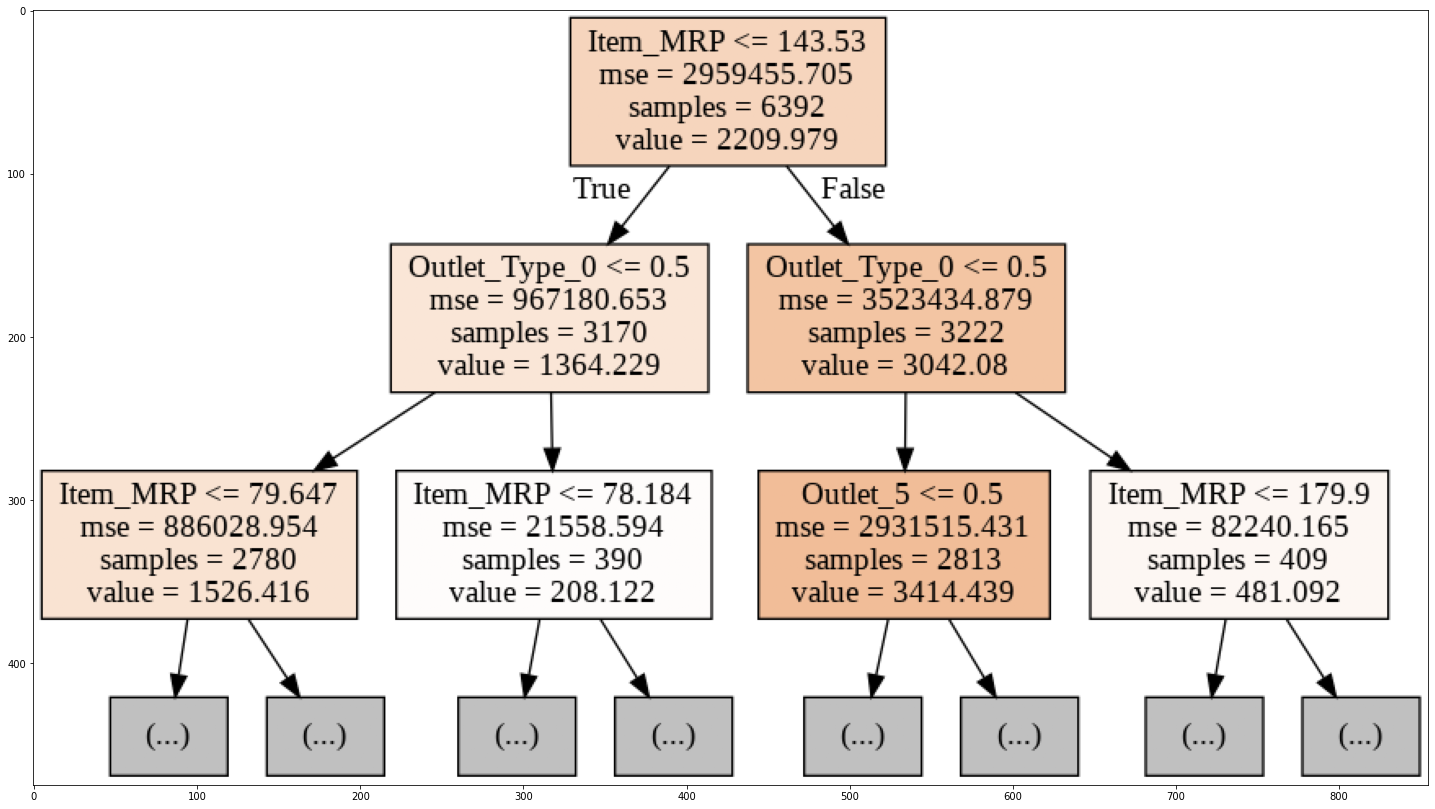

In [ ]:
# Visualising the decision tree
decision_tree = tree.export_graphviz(dt, out_file='tree.dot', feature_names=X_train.columns, filled=True, max_depth=2)

# converting the dot image to png format
!dot -Tpng tree.dot -o tree.png

#plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

This visualization of our decision tree clearly displays the rules it is using to make a prediction. Here, Item_MRP & Outlet_Type are the first features that are affecting the sales of various items at each outlet. 


# Global Surrogate
Next, we will create a surrogate decision tree model for this random forest model and see what we get.

In [ ]:
# creating the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100,n_jobs=-1)

# saving the predictions of Random Forest as new target
rf.fit(X_train, y_train)
new_target = rf.predict(X_train)

# defining the interpretable decision tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=10)

# fitting the surrogate decision tree model using the training set and new target
dt_model.fit(X_train,new_target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

This decision tree performs well on the new target and can be used as a surrogate model to explain the predictions of a random forest model. Similarly, we can use it for any other complex model.

# Implementing LIME in Python to generate local interpretations of black-box models
We can implement the LIME technique in both R & Python using the LIME package.  Let’s jump into implementation for the same to check the local interpretation of a given prediction using LIME:

In [ ]:
# installing lime library
!pip install lime

# import Explainer function from lime_tabular module of lime library
from lime.lime_tabular import LimeTabularExplainer

# training the random forest model
rf_model = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=-1, random_state=10)
rf_model.fit(X_train, y_train)

# creating the explainer function
explainer = LimeTabularExplainer(X_train.values, mode="regression", feature_names=X_train.columns)

# storing a new observation
i = 6
X_observation = X_test.iloc[[i], :]

print(f'RF prediction: {rf_model.predict(X_observation)[0]}')

RF prediction: 5670.720328626018


# Generate Explanations using LIME

In [ ]:
# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], rf_model.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.6855271266723871


The predicted value for sales is 185.40. Each feature’s contribution to this prediction is shown in the right bar plot. Orange signifies the positive impact and blue signifies the negative impact of that feature on the target. For example, Item_MRP has a positive impact on sales.

# LIME in Computer Vision

The basic idea is to understand why a machine learning model (deep neural network) predicts that an instance (image) belongs to a certain class (labrador in this case).

![banner](https://arteagac.github.io/blog/lime_image/img/lime_banner.png)



### Imports
Let's import some python utilities for manipulation of images, plotting and numerical analysis.

In [ ]:
%tensorflow_version 1.x
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

TensorFlow 1.x selected.


Using TensorFlow backend.


Notebook running: keras  2.3.1


In [ ]:
warnings.filterwarnings('ignore') 
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


96116736/96112376 [==============================] - 3s 0us/step


### Read and pre-process image
The instance to be explained (image) is resized and pre-processed to be suitable for Inception V3. This image is saved in the variable `Xi`. 

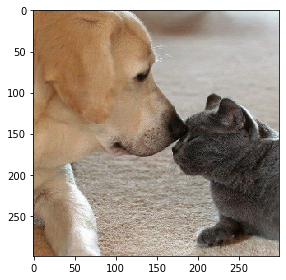

In [ ]:
Xi = skimage.io.imread("https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg")
Xi = skimage.transform.resize(Xi, (299,299)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing

### Predict class of input image
The Inception V3 model is used to predict the class of the image. The output of the classification is a vector of 1000 proabilities of beloging to each class available in Inception V3. The description of these classes is shown and it can be seen that the "Labrador Retriever" is the top class for the given image.

In [ ]:
np.random.seed(222)
preds = inceptionV3_model.predict(Xi[np.newaxis,:,:,:])
decode_predictions(preds)[0] #Top 5 classes


40960/35363 [==================================] - 0s 0us/step


[('n02099712', 'Labrador_retriever', 0.8273345),
 ('n02099601', 'golden_retriever', 0.014789644),
 ('n02093428', 'American_Staffordshire_terrier', 0.008711368),
 ('n02108422', 'bull_mastiff', 0.008177893),
 ('n02109047', 'Great_Dane', 0.007899417)]

The indexes (positions) of the top 5 classes are saved in the variable `top_pred_classes`

In [ ]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
top_pred_classes                #Index of top 5 classes

array([208, 207, 180, 243, 246])

## LIME explanations
The following figure illustrates the basic idea behind LIME. The figure shows light and dark gray areas which are the decision boundaries for the classes for each (x1,x2) pairs in the dataset. LIME is able to provide explanations for the predictions of an individual record (blue dot). The  explanations are created by generating a new dataset of perturbations around the instance to be explained (colored markers around the blue dot). The output or class of each generated perturbation is predicted with the machine-learning model (colored markers inside and outside the decision boundaries). The importance of each perturbation is determined by measuring its distance from the original instance to be explained. These distances are converted to weights by mapping the distances to a zero-one scale using a kernel function (see color scale for the weights). All this information: the new generated dataset, its class predictions and its weights are used to fit a simpler model, such as a linear model (blue line), that can be interpreted. The attributes of the simpler model, coefficients for the case of a linear model, are then used to generate explanations.  
![alt text](https://arteagac.github.io/blog/lime_image/img/lime_illustration.png)

A detailed explanation of each step is shown below.

### Step 1: Create perturbations of image
For the case of image explanations, perturbations will be generated by turning on and off some of the superpixels in the image.

#### Extract super-pixels from image
Superpixels are generated using the quickshift segmentation algorithm. It can be noted that for the given image, 68 superpixels were generated. The generated superpixels are shown in the image below.

In [ ]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

68

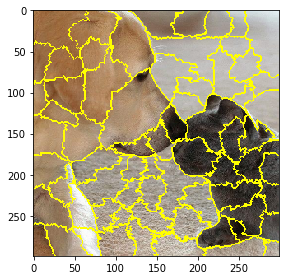

In [ ]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))

#### Create random perturbations
In this example, 150 perturbations were used. However, for real life applications, a larger number of perturbations will produce more reliable explanations. Random zeros and ones are generated and shaped as a matrix with perturbations as rows and superpixels as columns. An example of a perturbation (the first one) is show below. Here, `1` represent that a superpixel is on and `0` represents it is off. Notice that the length of the shown vector corresponds to the number of superpixels in the image.

In [ ]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1])

The following function `perturb_image` perturbs the given image (`img`) based on a perturbation vector (`perturbation`) and predefined superpixels (`segments`).

In [ ]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

Let's use the previous function to see what a perturbed image would look like:

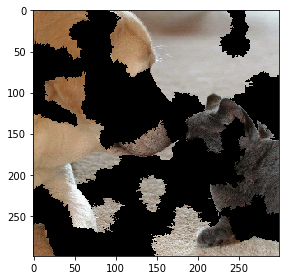

In [ ]:
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels))

### Step 2: Use ML classifier to predict classes of new generated images
This is the most computationally expensive step in LIME because a prediction for each perturbed image is computed. From the shape of the predictions we can see for each of the perturbations we have the output probability for each of the 1000 classes in Inception V3. 

In [ ]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = inceptionV3_model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

(150, 1, 1000)

### Step 3: Compute distances between the original image and each of the perturbed images and compute weights (importance) of each perturbed image
The distance between each randomly generated perturnation and the image being explained is computed using the cosine distance. For the shape of the `distances` array it can be noted that, as expected, there is a distance for every generated perturbation.

In [ ]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(150,)

#### Use kernel function to compute weights
The distances are then mapped to a value between zero and one (weight) using a kernel function. An example of a kernel function with different kernel widths is shown in the plot below. Here the x axis represents distances and the y axis the weights. Depeding on how we set the kernel width, it defines how wide we want the "locality" around our instance to be. This kernel width can be set based on expected distance values. For the case of cosine distances, we expect them to be somehow stable (between 0 and 1); therefore, no fine tunning of the kernel width might be required.

<img src="https://arteagac.github.io/blog/lime_image/img/kernel.png" alt="Drawing" width="600"/>

In [ ]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

### Step 4: Use `perturbations`, `predictions` and `weights` to fit an explainable (linear) model
A weighed linear regression model is fitted using data from the previous steps (perturbations, predictions and weights). Given that the class that we want to explain is labrador, when fitting the linear model we take from the predictions vector only the column corresponding to the top predicted class. Each coefficients in the linear model corresponds to one superpixel in the segmented image. These coefficients represent how important is each superpixel for the prediction of labrador.

In [ ]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([ 0.0199833 , -0.01601374,  0.10354327, -0.04821644,  0.08925877,
        0.07826848,  0.02714029,  0.07659395,  0.18122355, -0.05638588,
        0.03509676,  0.00470357,  0.02208912,  0.10356663,  0.07223697,
        0.0034734 ,  0.08162887,  0.03907232,  0.00769051,  0.02527205,
       -0.0100494 ,  0.02130284, -0.07029254, -0.02555164,  0.52121138,
        0.0205534 ,  0.0013183 , -0.17025011, -0.03082538,  0.14881233,
        0.05691062,  0.1011255 , -0.01224566, -0.04081408, -0.03864275,
       -0.02153394, -0.05745923,  0.02746975,  0.03796638,  0.03152467,
        0.03358099,  0.00733296,  0.04806797, -0.02303122, -0.0145786 ,
        0.08431814,  0.008036  , -0.01945883, -0.09000518,  0.05641921,
        0.02874261,  0.01926118, -0.03653446,  0.03901715, -0.05825456,
        0.03474161, -0.102688  ,  0.00780907, -0.03470868,  0.03349195,
        0.06900843, -0.05142001,  0.02219387,  0.05436448,  0.01072274,
       -0.03208548,  0.09252425, -0.0057378 ])

#### Compute top features (superpixels)
Now we just need to sort the coefficients to figure out which are the supperpixels that have larger coefficients (magnitude) for the prediction of labradors. The identifiers of these top features or superpixels are shown below. Even though here we use the magnitude of the coefficients to determine the most important features, other alternatives such as forward or backward elimination can be used for feature importance selection. 

In [ ]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
top_features

array([13, 29,  8, 24])

#### Show LIME explanation (image with top features)
Let's show the most important superpixels defined in the previous step in an image after covering up less relevant superpixels.

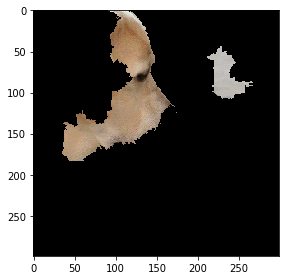

In [ ]:
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels) )

This is the final step where we obtain the area of the image that produced the prediction of labrador. You can download this notebook and perhaps test your own images to obtain explanations for your classification tasks. Also, you can use link at the beggining of the notebook to open and test it in the Google Colab environment without having to install anything in your computer.

# SHAP (SHapley Additive exPlanations)
### Shapley values:
Shapley value is the average contribution of features which are predicting in different situation.Shap Values break down a prediction to show the impact of each feature.

for example, if a manufacturing company's manager come up with high anual budget for production. He has to show the bases for such high budget.

Here I have taken an example of HR_comma.csv dataset. In this datset, the data of employees who left or did not left the company based on different features such as satisfaction_level, promotion_last_5year,etc is given.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/prachipatel01/Data_files.git
!ls Data_files
df=pd.read_csv(r"Data_files/HR_comma_sep.csv")

new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

df_dummies=pd.get_dummies(new_df.salary,prefix="salary")
new_df2=pd.concat([new_df,df_dummies],axis='columns')

new_df2=new_df2.drop('salary',axis='columns')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(new_df2, df.left, test_size=0.33)

reg=LogisticRegression()
reg.fit(X_train,y_train)

reg.predict(X_test)

print("score = ",reg.score(X_test,y_test))

feature_names = [i for i in new_df2.columns if new_df2[i].dtype in [np.int64]]

fatal: destination path 'Data_files' already exists and is not an empty directory.
headbrain.csv  HR_comma_sep.csv  titanic.csv
score =  0.7804040404040404


We will look at SHAP values for a single row of the dataset (we arbitrarily chose row 15). For context, we'll look at the raw predictions before looking at the SHAP values.

In [ ]:
row_to_show = 15
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


reg.predict_proba(data_for_prediction_array)

array([[0.44651612, 0.55348388]])

From the above obtained array we can see that a person is (array[1]/100)% likely to leave the company and (array[0]/100)% likely to not leave the company.

In [ ]:
pip install shap

     |████████████████████████████████| 276kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394115 sha256=1712ee9e2691f07f0fb7c7b3c305c9a824f23558e2d720d77ed6c7e301e65163
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Here, as shown bellow the k_shap_values object above is a list with two arrays. The first array is the SHAP values for a negative outcome (do not leave the company), and the second array is the list of SHAP values for the positive outcome (leave the company).So we will feed positive outcome(k_shap_value[1]) in force_plot function.

In [ ]:
# pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
k_explainer = shap.KernelExplainer(reg.predict_proba, X_train)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

Using 10049 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


### summary Plot-Aggregating Shap value:

Permutation importance doesn't tell you how each features matter. If a feature has medium permutation importance, that could mean it has a large effect for a few predictions, but no effect in general, or
a medium effect for all predictions.

SHAP summary plots give us a birds-eye view of feature importance and what is driving it.The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.The features are ordered according to their importance.

In [ ]:
# Create object that can calculate shap values
explainer = shap.KernelExplainer(reg.predict_proba, X_train)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)


Using 10049 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Each dot has three characteristics:

-> Vertical location shows what feature it is depicting 

-> Color shows whether that feature was high or low for that row of the dataset

-> Horizontal location shows whether the effect of that value caused a higher or lower prediction.

# SHAP Dependence Plots

SHAP dependence plots show the effect of a single (or two) feature across the whole dataset.We can use the dependence_plot method for ploting the effect of a feature on the prediction with or without the influence of another feature.

Each dot represents a row of the data. The horizontal location is the actual value from the dataset, and the vertical location shows what having that value did to the prediction. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature can be chosen for coloring to highlight possible interactions.


In [ ]:
shap.dependence_plot('satisfaction_level', shap_values[1], X_test, interaction_index="average_montly_hours")